### Import libraries

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

### Load data

In [2]:
train = pd.read_csv("/Users/thaitrinh/my_data/ml_data/titanic/train.csv")
test = pd.read_csv("/Users/thaitrinh/my_data/ml_data/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# train.describe()

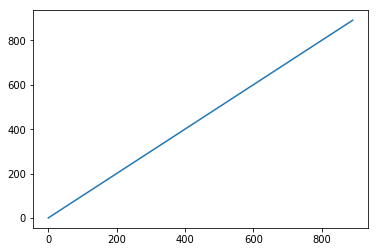

In [9]:
plt.plot(train["PassengerId"])

In [10]:
print(train["Survived"].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [11]:
print(train["Pclass"].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [12]:
print(train["Sex"].value_counts())

male      577
female    314
Name: Sex, dtype: int64


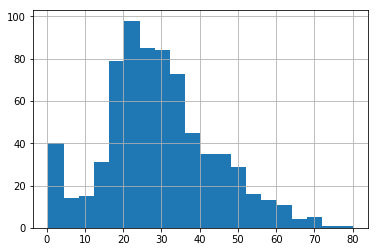

In [13]:
train["Age"].hist(bins=20) #Age has null values

- Training data has 12 columns, 891 rows, one column is label, one is id, the other 10 columns are features

In [14]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
train["Ticket"].value_counts()

CA. 2343        7
1601            7
347082          7
3101295         6
347088          6
CA 2144         6
S.O.C. 14879    5
382652          5
113781          4
347077          4
17421           4
2666            4
349909          4
LINE            4
113760          4
W./C. 6608      4
4133            4
19950           4
PC 17757        4
110152          3
PC 17755        3
363291          3
PC 17582        3
345773          3
24160           3
F.C.C. 13529    3
29106           3
371110          3
35273           3
248727          3
               ..
C 4001          1
349231          1
364851          1
C.A. 18723      1
113051          1
250643          1
17463           1
244278          1
SC/AH 3085      1
110564          1
31028           1
2926            1
C 17369         1
2695            1
36865           1
113028          1
2689            1
A./5. 2152      1
349254          1
28220           1
330877          1
345777          1
244310          1
363294          1
4138      

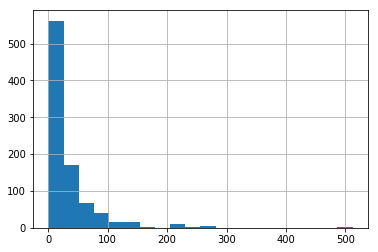

In [17]:
train["Fare"].hist(bins=20)

In [18]:
train["Cabin"].value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
F33                3
F2                 3
C22 C26            3
E101               3
D                  3
E33                2
C68                2
B18                2
F4                 2
B20                2
C124               2
C2                 2
D20                2
B49                2
C125               2
B77                2
D35                2
C78                2
D33                2
B22                2
E67                2
B57 B59 B63 B66    2
C52                2
B5                 2
E44                2
E8                 2
C93                2
                  ..
D48                1
B50                1
E46                1
D9                 1
C101               1
C128               1
C32                1
A20                1
C54                1
D21                1
C111               1
C87                1
B19                1
B69                1
C106               1
A5                 1
C7           

In [19]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Base model
 - Pclass, Sex, SibSp, Parch, Embarked as categorical -> one-hot encoded
 - Age and Fare as numeric features
 - Name and Ticket as text. Simple bag of word model
 - Ignore Cabin
 - Logistic regression

### Pipeline

#### An estimator for choosing attributes

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        #return X[self.attribute_names].values
        return X[self.attribute_names]

#### Pipeline for numeric features

 - select numeric features
 - imputing missing values using median values
 - standard scale for features

In [21]:

num_att = ["Age", "Fare"]

num_pipeline = Pipeline([
    ("select_num", DataFrameSelector(num_att)),
     ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

#### Pipeline for categorical features
 - select categorical features
 - imputing missing value using most frequency value (“most_frequent”)
 - one hot encoded

In [22]:
class CategoricalWarrior(BaseEstimator, TransformerMixin):
    """One hot encoder for all categorical features"""

    def fit(self, X, y=None):
        """
        fit function first creates a dictionary.
        Each element has: key word=categorical column name, value=unique value in the categorical column
        then fit function creates a new attribute call categoricals, which equals the dictionary
        """
        cats = {}
        self.ncols = X.shape[1]
        for col in range(self.ncols):
            cats[col] = np.unique(X[:, col]).tolist()
        self.categoricals = cats
        return self

    def transform(self, X, y=None):
        """
        transform turns first convert the categorical columns into categorical data type
        with given categories (defined from function "fit" above)
        This means that if the new category appear in the test set, they will be ignored
        Then it uses function get_dummies to convert to one hot encoded data        
        """
        mydict = {}
        for col in range(self.ncols):
            mydict[col] = pd.Categorical(X[:, col], categories=self.categoricals[col])
        df = pd.DataFrame(mydict)
        new_df = pd.get_dummies(df, drop_first=False)
        # in case we need them later
        self.columns = new_df.columns
        return new_df

    

In [23]:
cat_att = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(cat_att)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_maker", CategoricalWarrior())])

#### Pipeline for text features

In [24]:
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_name):
        self.attribute_name = attribute_name
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        #return X[self.attribute_names].values
        return X[self.attribute_name].tolist()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# pipeline for Name column
name_pipeline = Pipeline([
    ("select_text", ItemSelector("Name")),
    ("count_vectorizer", CountVectorizer())
])

# pipeline for Ticket column
ticket_pipeline = Pipeline([
    ("select_text", ItemSelector("Ticket")),
    ("count_vectorizer", CountVectorizer())
])

In [26]:
# # test the first pipeline
# name_pipeline.fit(train)
# name_train = name_pipeline.transform(train)
# name_test = name_pipeline.transform(test)
# name_train
# name_test
# # test the second pipeline
# ticket_pipeline.fit(train)
# ticket_train = ticket_pipeline.transform(train)
# ticket_test = ticket_pipeline.transform(test)

#### Join all pipeline

In [27]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ("name_pipeline", name_pipeline),
    ("ticket_pipeline", ticket_pipeline)
])

### Process data

In [28]:
full_pipeline.fit(train)
xtrain = full_pipeline.transform(train)
xtest = full_pipeline.transform(test)

In [29]:
print(xtrain.shape)
print(xtest.shape)

(891, 2228)
(418, 2228)


In [30]:
ytrain = train["Survived"]
ytrain.shape

(891,)

### Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ytrain_pred = lr.predict(xtrain)

/Users/thaitrinh/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
print(accuracy_score(ytrain, ytrain_pred))

0.9494949494949495


- Up to now, the code focuses on creating ML pipeline for automatically preprocessing the data 
- Next step would be trying other way of NLP for example: Tfidf, Word embedding
- Try more feature engineering as suggested here: https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/
- Use cross validation
- Make prediction and take part in the competition
- Check solution of other people